# Несколько слов про tool-блоки в домашках

Классного датасаентиста помимо всего прочего отличает его "портфель" - набор готового кода на все случаи жизни,
    который он носит с собой где бы он ни работал и какую бы домашку не делал. Во время различных профессиональных занятий
    всегда хорошо сохранить функцию, которая помогла вам сейчас решить конкретную задачу себе "в папочку", чтобы столкнувшись
    с такой / похожей задачей дальше, иметь под рукой oneliner, который сделает все так, как вам хочется.
    
Время от времени в ваших домашках будут появляться tool-блоки, в которых мы будем просить вас написать что-нибудь, что вам
    пригодится в дальнейшем, а также закрепляет пройденный материал.
    Настоятельно рекомендуем завести себе хранилище, куда вы будете складывать функции из домашек,
    а также те, которые напишете сами и сочтете достойными.
    
Скорее всего со временем, вы захотите дополнить / исправить / переделать под себя эти функции, и это правильно,
    однако в домашках нужно сделать ровно то, что написано в задании - ни больше, ни меньше. Все остальное - уже самостоятельно.
    Можно воспринимать функции из домашек как шаблоны, вдохновляющие вас на дальнейшее творчество.
    Чтобы вы в будущем могли разобраться, что происходит у вас в коде (а тем более - проверяющие), мы будем просить вас писать
    комментарии к вашему коду и докстринги (пример ниже). Это несложная и очень полезная привычка, которая выручит вас не раз.

Условия проверки tool-блоков:
- Если какая-то часть задания не реализована или вы сделали что-то запрещенное, вы получаете 0 баллов за задачу
- Если сделано все, что описано в задании и не сделано ничего запрещенного, есть docstring и комментарии к коду,
    вы получаете полный балл за задачу
- После получения полного балла, могут быть вычтены баллы за любого рода неадекватность. Размер штрафа субъективен
    и коррелирует с масштабом неадекватности - на что-то можно закрыть глаза, на что-то не получится.
- Вспомогательные принты и любые следы тестирования - неадекватность
- Неадекватностью может являться кривое выполнение пункта задания, однако если мы посчитаем пункт кривым,
    это не значит, что у вас 0 за задачу. Не сделать и сделать неправильно - разные вещи
- Некоторые советы и намеки на то, что считается адекватным для конкретной задачи, можно будет найти в задании :)

In [ ]:
Гринченко Егор

В данной домашке вам предлагается реализовать две функции на датасете титаник, немного измененном следующим образом:

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('titanic/train.csv')
df.Embarked.replace('Q', '', inplace=True)
df.PassengerId = df.PassengerId.astype('string')

## tool: информация о колонках датафрейма (4 балла)

Напишите функцию `get_df_info`, которая будет выводить информацию о колонках входного датафрейма. Функция должна возвращать датафрейм следующего формата:

- индекс - все колонки входного датафрейма


- в колонках результирующего датафрейма содержится следующая информация (см. пример ниже):
    - тип данных
        - используйте `df.col.dtype.name`
    - количество уникальных элементов
        - включая наны
    - доля нанов в колонке
    - доля нулей в колонке
    - доля пустых строк в колонке
    - доля самого частовстречаемого элемента в колонке + сам этот элемент (aka `vc_max`)
        - исключая наны
        - в одной колонке или в двух разных - решать вам
        
    - два разных примера содержимого колонки
        - исключая наны
        - в одной колонке или в двух разных - решать вам
        
    - `trash_score` колонки: max([суммарная доля нанов, нулей и пустых строк], [`vc_max`.доля if `vc_max`.доля > thr else 0])
        - thr нужно принимать в качестве аргумента функции, поставив по умолчанию что-то адекватное
      
      
- про адекватность
    - нужно сделать так, чтобы как можно больше выводимой вами информации было понятно глазу без доп. усилий
    - округляйте до трех знаков доли
    - выводите чистый 0 спецсимволом, чтобы не путать с округлившимся 0.00001
    - если нужно, выводите числа в виде строк
    - убедитесь, что в случае когда двух примеров не набирается, вы можете отличить информацию "примера нет" от пустой строки
    - можете использовать доп. символы, чтобы отличать колонки быстрее, где нужно (напр. 'z:', 'n:', 'e:')
    - обрабатывайте любые другие возникающие неадекватные ситуации и приводите их в адекватный вид :)
    
    
- запрещено: итерироваться по строкам входного датафрейма в любом виде

In [2]:
def get_df_info(df, thr = 0.8, *args, **kwargs):
    column_headers = list(df.columns.values)
    dtype = df.dtypes
    
    nunique = df.nunique(dropna = False)
    
    two_examples = df.apply(lambda x: x.drop_duplicates().dropna().sample(2, ignore_index = \
                                                                          True).replace('', "''")).astype(str)
    
    
    z_fraction = (df == 0).sum(axis=0) / df.axes[0].size
    zero = 'z: ' + round(z_fraction.replace(0, -1), 3).astype(str)
    zero = zero.replace('z: -1.0', '-1')
    
    n_fraction = (df.isna()).sum(axis=0) / df.axes[0].size
    nan = 'n: ' + round(n_fraction.replace(0, -1), 3).astype(str)
    nan = nan.replace('n: -1.0', '-1')
    
    e_fraction = (df == '').sum(axis=0) / df.axes[0].size
    empty_str = 'e: ' + round(e_fraction.replace(0, -1), 3).astype(str)
    empty_str = empty_str.replace('e: -1.0', '-1')
    
    mode = df.mode().iloc[0]
    m_fraction = (df == mode).sum(axis = 0) / df.notna().sum(axis = 0)
    
    vc_max = round(m_fraction.replace(0, -1), 3).astype(str)
    vc_max = '('+ vc_max  + ', ' + mode.astype(str) + ')'
    
    m_fraction.loc[m_fraction <= thr] = 0
    trash_score = pd.DataFrame([m_fraction, e_fraction + z_fraction + n_fraction, m_fraction]).max().replace(0,-1)
    trash_score = round(trash_score, 3).apply(str).replace('-1.0', '-1')
    
    data_ans = pd.DataFrame(
        {
            "dtype": df.dtypes,
            "nunique": df.nunique(dropna = False),
            "two_examples": '(' + two_examples.iloc[0] + ', ' + two_examples.iloc[1] + ')',
            "zero": zero,
            "nan": nan,
            "empty_str": empty_str,
            "vc_max": vc_max,
            "trash_score": trash_score,
        },
        
        index= column_headers
    )
    return data_ans.sort_values(by = 'trash_score', ascending = False)
    
    

In [3]:
get_df_info(df).head(15)

,dtype,nunique,two_examples,zero,nan,empty_str,vc_max,trash_score
Cabin,object,148,"(B101, B37)",-1,n: 0.771,-1,"(0.02, B96 B98)",0.771
Parch,int64,7,"(3, 0)",z: 0.761,-1,-1,"(0.761, 0.0)",0.761
SibSp,int64,7,"(0, 3)",z: 0.682,-1,-1,"(0.682, 0.0)",0.682
Survived,int64,2,"(1, 0)",z: 0.616,-1,-1,"(0.616, 0.0)",0.616
Age,float64,89,"(1.0, 57.0)",-1,n: 0.199,-1,"(0.042, 24.0)",0.199
Embarked,object,4,"(C, S)",-1,n: 0.002,e: 0.086,"(0.724, S)",0.089
Fare,float64,248,"(93.5, 7.8792)",z: 0.017,-1,-1,"(0.048, 8.05)",0.017
PassengerId,string,891,"(133, 166)",-1,-1,-1,"(0.001, 1)",-1
Pclass,int64,3,"(3, 2)",-1,-1,-1,"(0.551, 3.0)",-1
Name,object,891,"(Leinonen, Mr. Antti Gustaf, Pears, Mrs. Thoma...",-1,-1,-1,"(0.001, Abbing, Mr. Anthony)",-1


In [ ]:
# Это пример, не запускайте эту ячейку

get_df_info(df)

,dtype,nunique,example_1,example_2,zero,nan,empty_str,vc_max,trash_score
,,,,,,,,,
Cabin,object,147,C148,B42,-1,n: 0.771,-1,"(0.02, G6)",0.771
Parch,int64,7,6,4,z: 0.761,-1,-1,"(0.761, 0)",0.761
SibSp,int64,7,8,5,z: 0.682,-1,-1,"(0.682, 0)",0.682
Survived,int64,2,1,0,z: 0.616,-1,-1,"(0.616, 0)",0.616
Age,float64,88,74.0,34.5,-1,n: 0.199,-1,"(0.042, 24.0)",0.199
Embarked,object,3,'',C,-1,n: 0.002,e: 0.086,"(0.724, S)",0.089
Fare,float64,248,10.5167,9.8458,z: 0.017,-1,-1,"(0.048, 8.05)",0.017
Ticket,object,681,370376,111369,-1,-1,-1,"(0.008, 347082)",-1
Sex,object,2,female,male,-1,-1,-1,"(0.648, male)",-1


## tool: распределения признаков (6 баллов)

#### чтобы получить полный балл, нужно еще ответить на вопрос в конце

Нужно реализовать рисовалку распределения колонок датафрейма через функцию или через класс, как вам удобней.
    Отрисовываемые колонки принимаются на вход. Далее вы для каждой такой колонки создаете `fig, ax` и отрисовываете туда то,
    что описано ниже в задании. Также, на вход принимается hue-колонка (см. семинар), по которой бьется раскраска.

- для числовых колонок
    - sns.histplot
        - предобработка данных: принимайте на вход флажок `drop_zero`. Если он True, выкиньте все нули прежде чем рисовать
        - количество бинов остается за вами
        - используйте аргументы `multiple='stack'`, `element='step'` (самый быстрый), `stat='count'`,
            `alpha=0.8` (чтобы подогнать цвет гистограммы под остальные цвета, без этого будет слишком яркий график)
        
    - sns.boxenplot + sns.stripplot
        - предобработка данных: если `drop_zero`, рисуем оба графика без нулей
        - в boxenplot используйте `showfliers=False`, выбросы будут подсвечиваться stripplot'ом
        - в stripplot не нужно рисовать все точки, нужно засэмплировать немного (напр. 200)
        
    - special (0, np.nan)
        - это будет sns.barplot, показывающий распределение по спец. значениям - нулям и нанам
        - предобработка данных: посчитайте для каждого значения колонки `hue` (см. groupby) долю нанов и нулей
            (независимо от `drop_zero`), оберните в датафрейм и отрисуйте с помощью sns.barplot
        - вместо чистого нуля используйте что-то отрицательное (напр. -0.1 * [значение самого высокого бина])
        - используйте у barplot аргумент `edgecolor='black'`
        - добавьте `ax.axhline(0, color='black', ls='--')` на этот же ax, чтобы четко выделить 0
        - добавьте горизонтальную решетку `ax.grid(True, axis='y')`
        
    
- для категориальных колонок
    - категориальными считаем все (числовые / нечисловые) колонки c количеством уникальных
        значений меньше `max_cat_thr`: принимаем на вход (напр. 20)
        
    - sns.countplot + обработка пустых строк, нанов
        - предобработка данных: замените все наны и пустые строки на понятные вам спецстроки для наглядности (см. пример)
        - используйте `stat='count'`, `edgecolor='black'`
        - добавьте горизонтальную решетку
        - поверните выводимые значения на оси X на 90 градусов `ax.tick_params('x', rotation=90)`
        
        
- общее:
    - убедитесь, что не рисуете колонку, которую передаете в hue, а также колонки, которые не попали ни в числовые,
        ни в категориальные
    
    - настройте `ax.set_title`, `fig.suptitle` - пусть они помогают вам и нам быстро разобраться, что на графике.
        Не нужно подписывать, что на графике histplot или что-то подобное, лучше подпишите какое-нибудь уточнение к графику,
        например, что ящики построены без учета выбросов. Однако, не нужно плодить лишнего.
    
    - уберите все ненужные `ax.set_xlabel`, `ax.set_ylabel`
    
    - пусть на каждую колонку у вас будет по одной легенде на любом из графиков
    
    - настройте у графиков аргумент `hue_order`, но `sns.boxenplot(..., order=)`, чтобы заранее зафиксировать порядок раскраски.
        Например, если ваша hue-колонка Survived, то `hue_order=[0, 1]` зафиксирует, что у вас все что относится к значению 0
        всегда покрасится в первый цвет, а к 1 - во второй. Если вы не будете так делать, вам не всегда гарантируется ожидаемая
        покраска.
    
    - настройте достаточно крупный размер шрифта у всего, у чего можно - аргумент `fontsize`,
        но `ax.tick_params(..., labelsize=)` (напр. 15). Заметка: если создавать легенду через ax.legend(...), задать ей размер
        шрифта можно с помощью аргумента `fontsize`. Но если делать автолегенду в сиборновских функциях (аргумент legend), то
        поменять ей размер шрифта уже очень сложно. Выход - заранее задать в матплотлибе размер шрифта легенды по умолчанию на
        достаточно крупный (код ниже).
        
        
- про адекватность: ниже дан пример того, что у вас может получиться. Там не везде настроен размер шрифтов и не везде интуитивно
    вам понятные titles, но в остальном - пойдет. Главное - чтобы все было хорошо видно и не было лишнего.
    
    
- на будущее: пытаясь применить эту рисовалку на других датасетах, вы столкнетесь с множеством проблем, поскольку задание
    сформулировано только для титаника, и чтобы не переусложнять, не включает в себя разные нюансы.
    Пусть вас это не пугает - переписывайте, добавляйте, исправляйте, все получится! Иметь корректно работающую на любом
    датасете рисовалку очень полезно :)
    

In [809]:
# Если у вас ошибка вида 'float64 has no attribute startswith', лучше переключитесь на matplotlib 3.6.0

# Сделать это можно, например, так, после чего перезапустить ядро ноутбука
# !pip install --upgrade matplotlib==3.6.0

In [4]:
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt

# настройка размера шрифта легенды
mpl.rcParams['legend.title_fontsize'] = 13
mpl.rcParams['legend.fontsize'] = 13

In [30]:
def plot_density(df, hue, cols=None, drop_zero = False, max_cat_thr = 20):
    mosaic = '''
    abc
    '''
    if cols == None:
        cols = df.drop(hue, axis = 1).columns
        cols_char_num = df.drop(hue, axis = 1).select_dtypes(include=np.number).columns
    cols_values = []
    cols_char = []
    for column in cols_char_num:
        if df[column].nunique() > max_cat_thr: 
            cols_values.append(column)
    for column in cols:
        if df[column].nunique() <= max_cat_thr:
            cols_char.append(column)
    for column in cols_values:
        fig, ax = mpl.pyplot.subplot_mosaic(mosaic)
        fig.suptitle(column + " vs " + hue)
        if drop_zero:
            sns.histplot(df[df[column] != 0], x = column, hue = hue, bins = 40, multiple='stack', element='step', \
                        stat='count', alpha=0.8, ax=ax['a'])
            sns.boxenplot(data = df[df[column] != 0], x= hue, y = column, showfliers=False, \
                          hue_order = df[hue].values, ax=ax['b'])
            sns.stripplot(data = df[df[column] != 0].groupby(hue).sample(200), x = hue, y = column, \
                          hue_order = df[hue].values, color='black', ax=ax['b'])
        else:
            sns.histplot(data = df, x = column, hue = hue, bins = 40, multiple='stack', element='step', \
                         stat='count', alpha=0.8)
            sns.boxenplot(data = df, x= hue, y = column, showfliers=False, \
                          hue_order = df[hue].values)
            sns.stripplot(data = df.groupby(hue).sample(200), x = hue, y = column, \
                          hue_order = df[hue].values, color='black')
        data = df.groupby(hue)
        df1 = data[column].agg(lambda x: (x == 0).sum() / x.size).to_frame(name = 'value')
        df1['type'] = '0'
        df2 = data[column].agg(lambda x: x.isna().sum() / x.size).to_frame(name = 'value')
        df2['type'] = 'NaN'
        data = pd.concat([df1, df2], axis = 0).reset_index()
        data.value = data.value.replace(0, -0.1 * data.value.max())
        ax['c'].set_title('sns.barplot :3', fontsize=15)
        ax['c'].axhline(0, color='black', ls='--')
        ax['c'].grid(True, axis='y')
        sns.barplot(data = data, x = 'type', y = 'value', hue = hue, edgecolor='black', ax=ax['c'])
        print('################################################################################')
        fig.set_size_inches(15, 5)
        plt.show()  
    for column in cols_char:
        fig, ax = plt.subplots()
        fig.suptitle(column + " vs " + hue)
        df.replace('', '<empty>')
        df.fillna('<NaN>')
        sns.countplot(data = df, x = column, hue = hue, stat='count', edgecolor='black')
        ax.tick_params('x', rotation=90)
        ax.grid(True, axis='y')
        print('################################################################################')
        fig.set_size_inches(15, 5)
        plt.show()
    print('################################################################################')

################################################################################


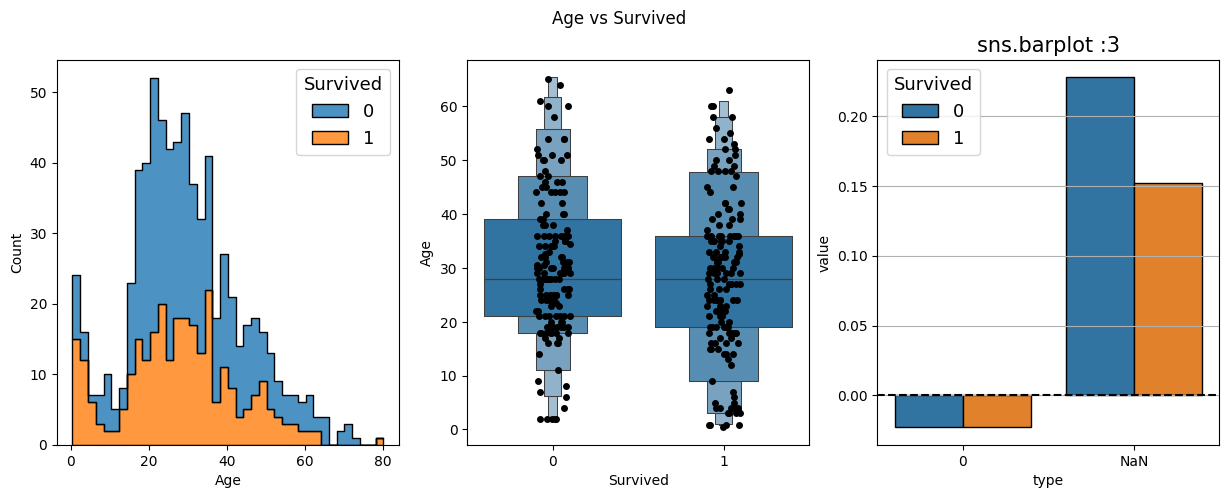

################################################################################


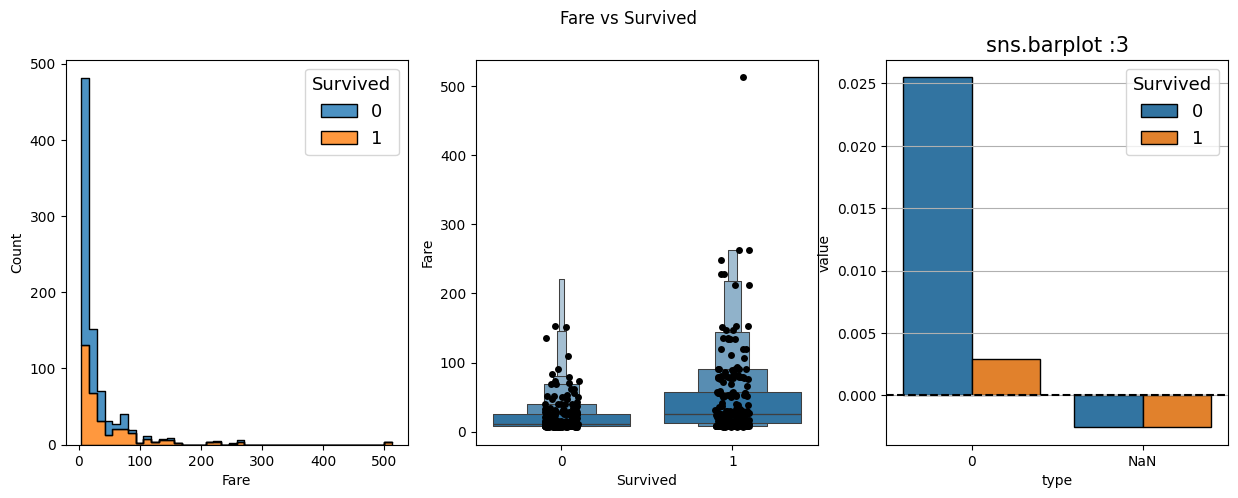

################################################################################


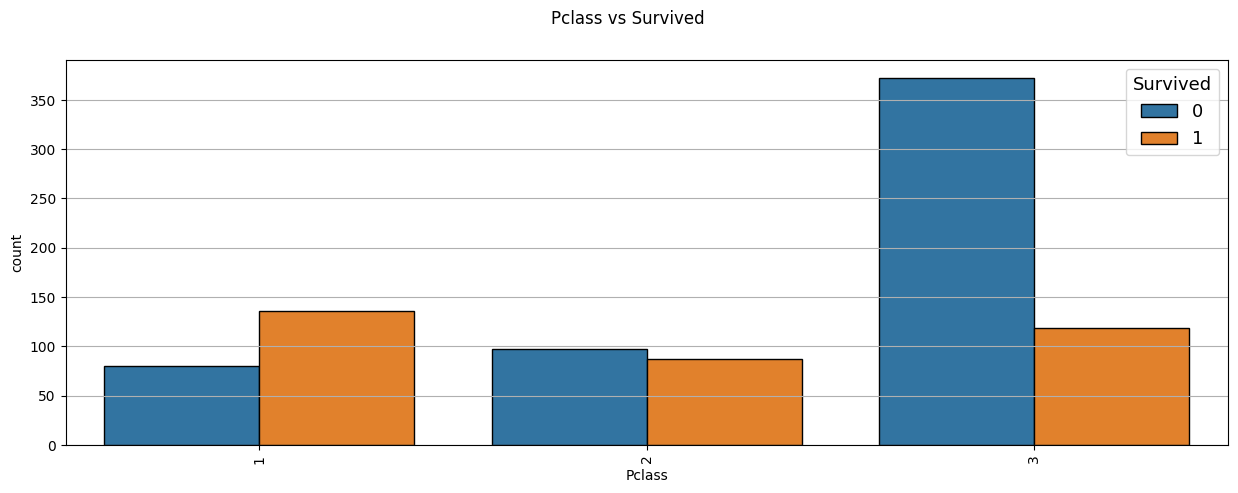

################################################################################


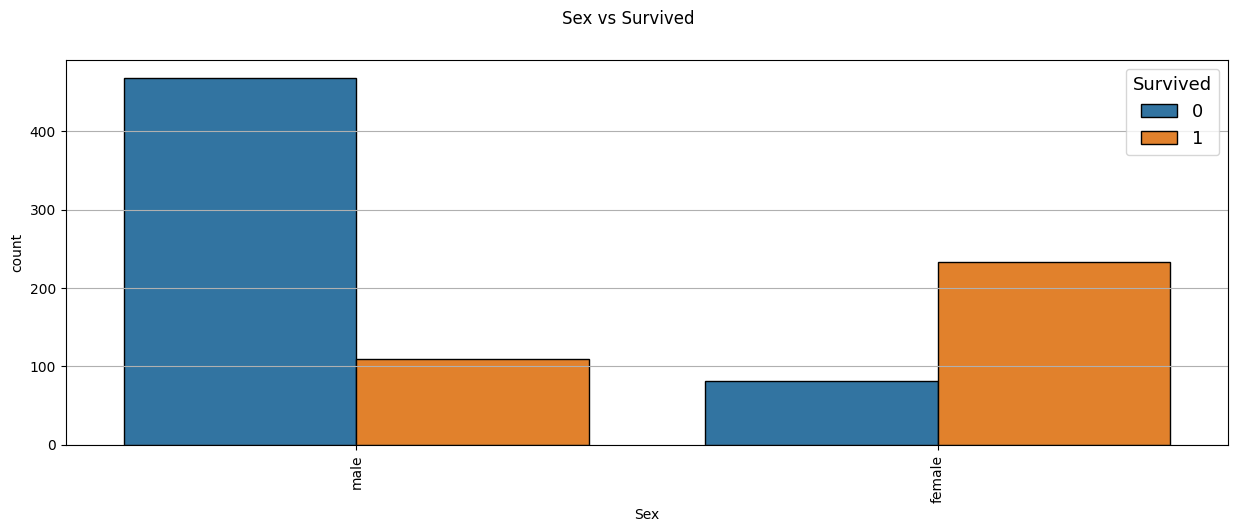

################################################################################


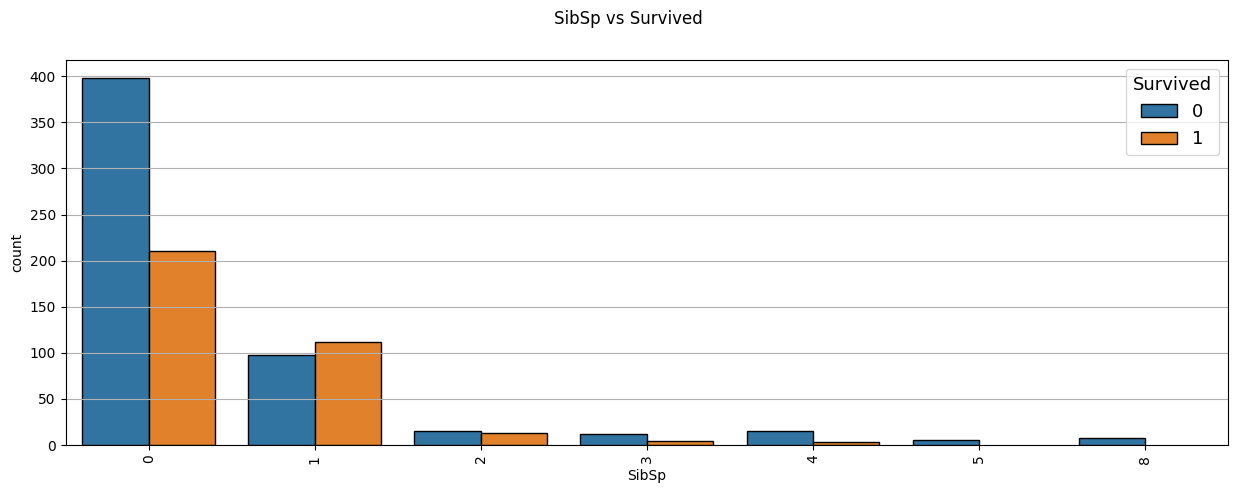

################################################################################


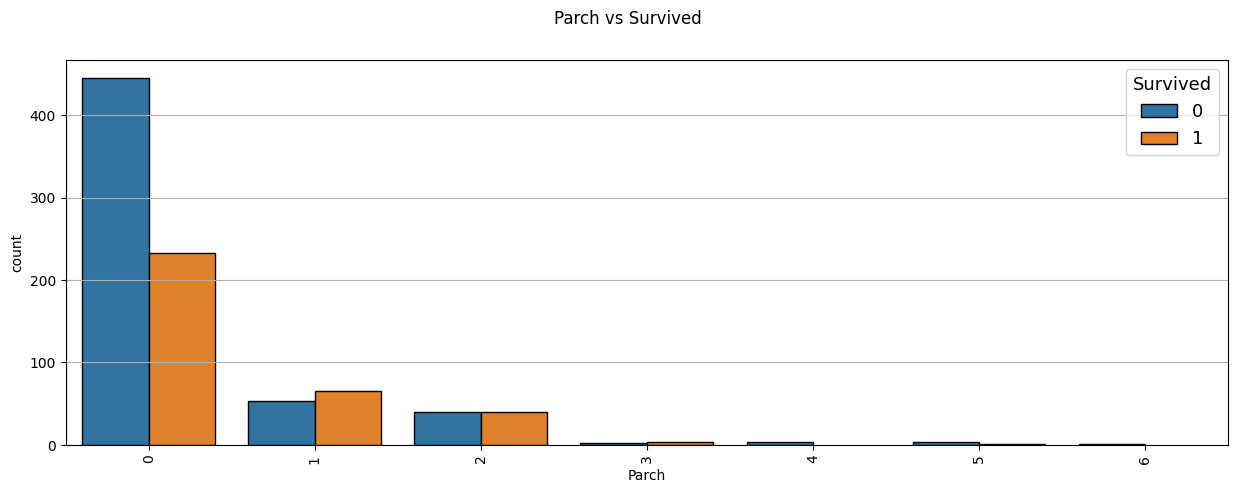

################################################################################


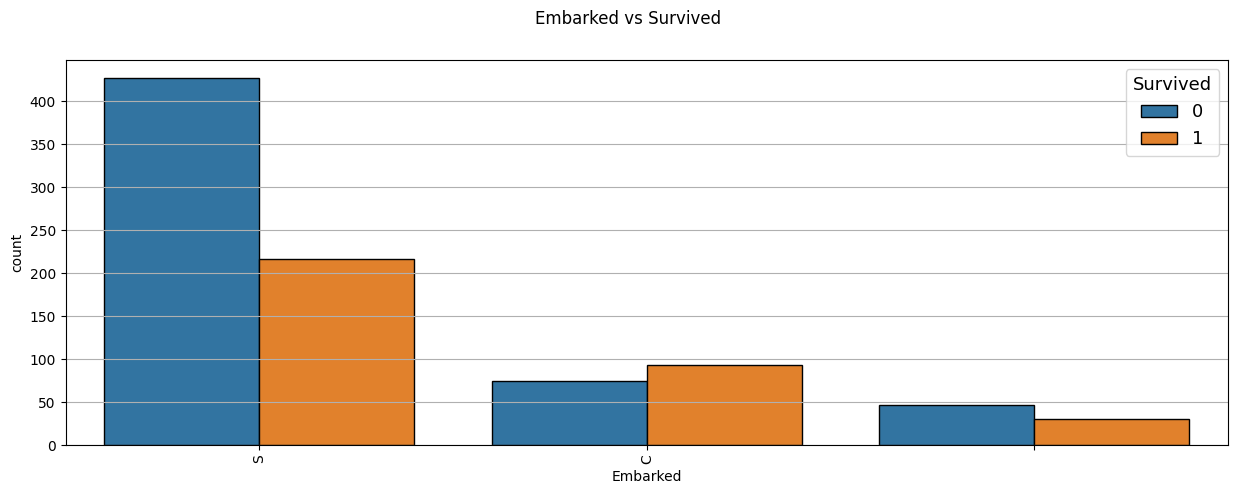

################################################################################


In [31]:
plot_density(df, hue = 'Survived', drop_zero = True)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
################################################################################


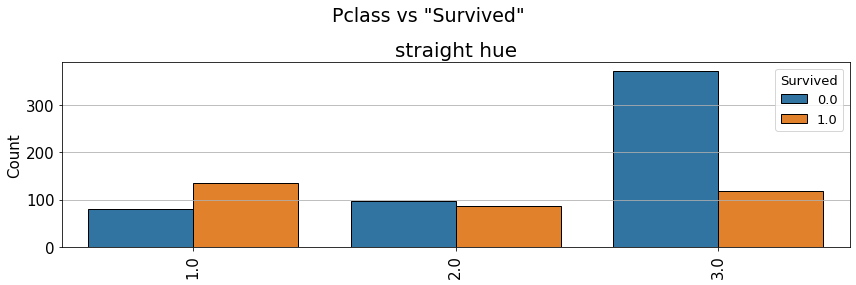

################################################################################


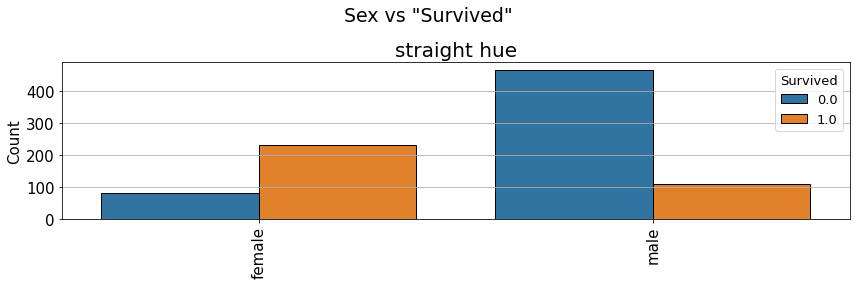

################################################################################


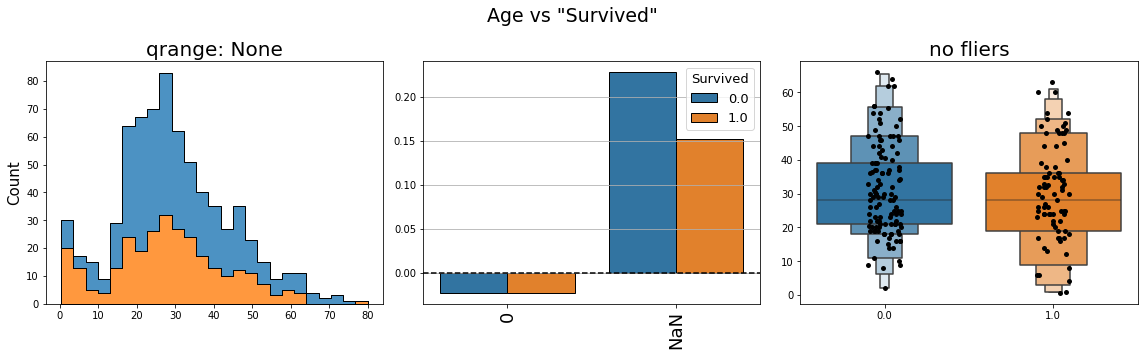

################################################################################


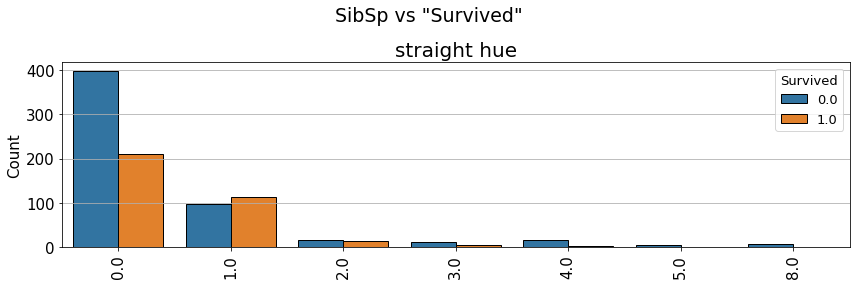

################################################################################


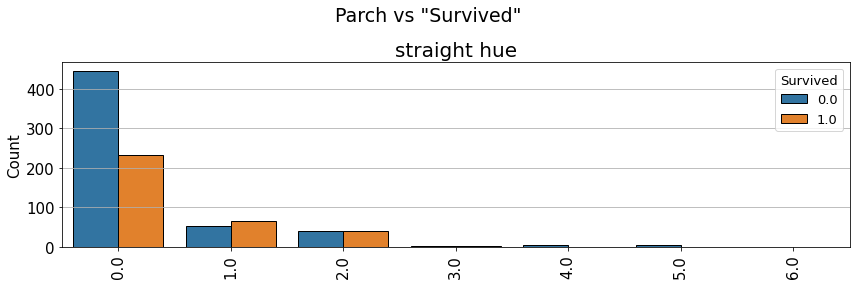

################################################################################


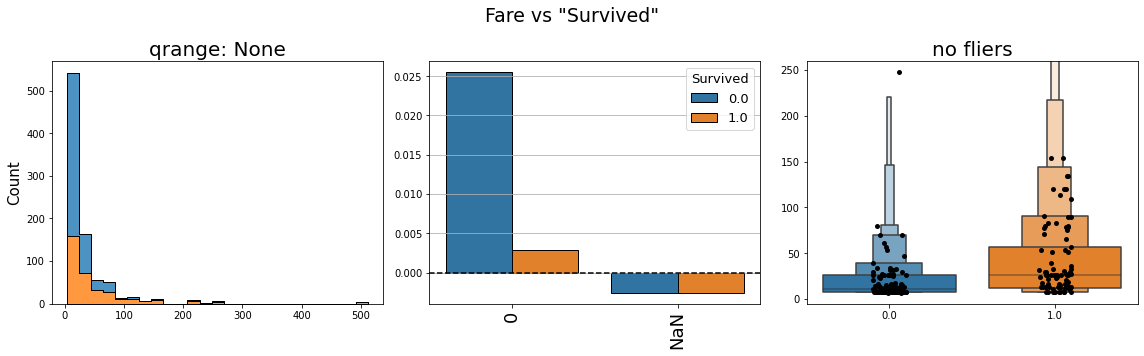

################################################################################


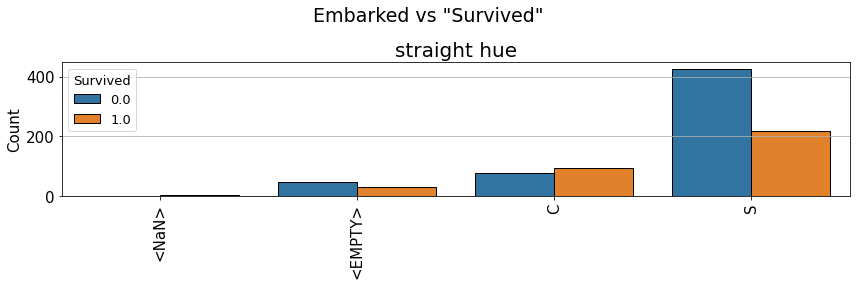

################################################################################


In [ ]:
# Это пример, не запускайте эту ячейку

plot_density(df, hue='Survived')

***Вопрос:*** Как вы думаете, какие проблемы с этой рисовалкой могут возникнуть при применении ее на других датасетах?

In [1]:
Проблемы могут возникнуть, когда целевой столбик hue не явлется бинарным классом. К примеру, для датасеста с 
текущей ценой квартиры, при использовании в качестве hue столбца стоимости мы будем отрисовывать каждую строчку.
Такая же проблема будет наблюдаться, если у нас будет довольно много различных классов hue, графики не будут
информативными и устойчивыми, к примеру, если у нас есть табличка с информацией о людях и в качестве hue мы будем
брать их рост.